In [25]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.datasets.imdb as imdb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
data = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()

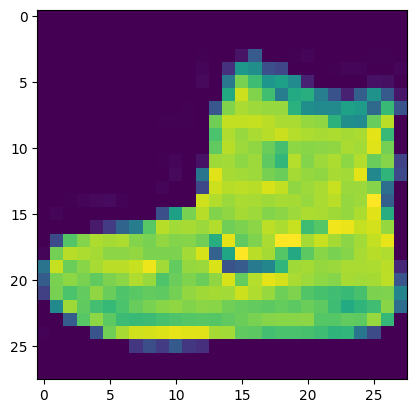

In [27]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.imshow(train_images[0])
plt.show()

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(len(class_names), activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [29]:
model.fit(train_images, train_labels, epochs=10) # epoch = amount of times the model reads the data

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 997us/step - accuracy: 0.6746 - loss: 10.7065
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 857us/step - accuracy: 0.7456 - loss: 0.7650
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 877us/step - accuracy: 0.7712 - loss: 0.6463
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 861us/step - accuracy: 0.7809 - loss: 0.6167
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 866us/step - accuracy: 0.7920 - loss: 0.5752
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 837us/step - accuracy: 0.7976 - loss: 0.5618
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 880us/step - accuracy: 0.8048 - loss: 0.5525
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 834us/step - accuracy: 0.8067 - loss: 0.5304
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 857us/step - accuracy: 0.8067 - loss: 0.5332
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 959us/step - accuracy: 0.8058 - loss: 0.5331


In [30]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.8005 - loss: 0.6389
0.7975999712944031


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step


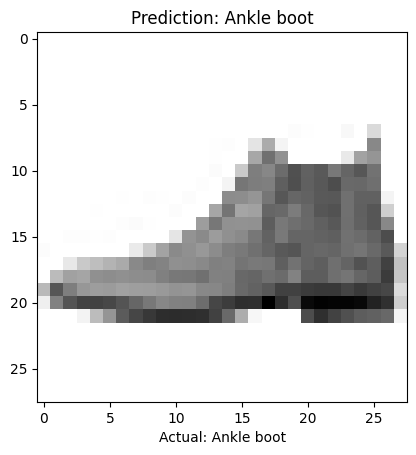

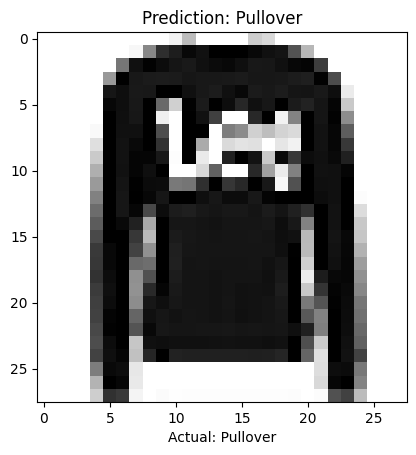

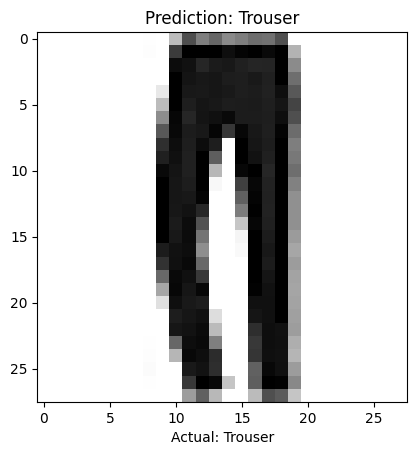

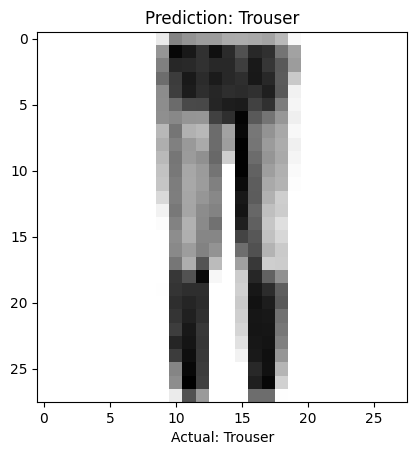

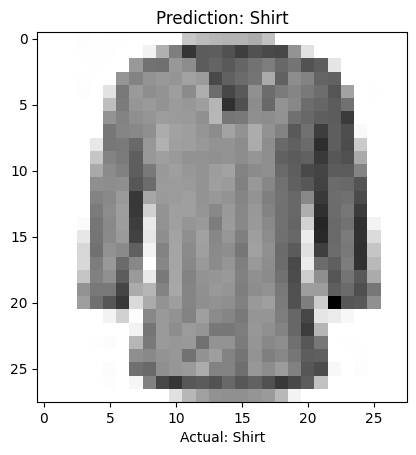

In [31]:
prediction = model.predict(test_images)

for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Actual: " + class_names[test_labels[i]])
    plt.title("Prediction: " + class_names[np.argmax(prediction[i])])
    plt.show()

In [32]:
data = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = data.load_data(num_words=88000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [38]:
word_index = imdb.get_word_index()
word_index = {k:(v+3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>]"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value=word_index["<PAD>"], padding="post", maxlen=250)

In [36]:
def decode_review(text):
    return " ".join([reverse_word_index.get(i, "?") for i in text])

decode_review(test_data[0])

"<START> please give this one a miss br br kristy swanson and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite lacklustre so all you madison fans give this a miss"

In [37]:
print(len(test_data[0]), len(test_data[1]))

68 260


In [40]:
model = keras.Sequential([
    keras.layers.Embedding(88000, 16),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.summary()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
x_val = train_data[:10000]
x_train = train_data[10000:]

y_val = train_labels[:10000]
y_train = train_labels[10000:]

# Apply the same preprocessing to test_data as you did to train_data
test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=word_index["<PAD>"], padding="post", maxlen=250) 

# Now evaluate the model
results = model.evaluate(test_data, test_labels)
print(results)

fitModel = model.fit(x_train, y_train, epochs=40, batch_size=512, validation_data=(x_val, y_val), verbose=1)
results = model.evaluate(test_data, test_labels)
print(results)

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.8792 - loss: 0.3104
[0.3168489336967468, 0.8774799704551697]
Epoch 1/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9893 - loss: 0.0549 - val_accuracy: 0.8896 - val_loss: 0.2912
Epoch 2/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9916 - loss: 0.0489 - val_accuracy: 0.8894 - val_loss: 0.2950
Epoch 3/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9912 - loss: 0.0513 - val_accuracy: 0.8881 - val_loss: 0.2957
Epoch 4/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9911 - loss: 0.0478 - val_accuracy: 0.8884 - val_loss: 0.2994
Epoch 5/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9928 - loss: 0.0434 - val_accuracy: 0.8880 - val_loss: 0.3012
Epoch 6/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9933 - loss: 0.0444 - val_accuracy: 0.8816 - val_loss: 0.3169
Epoch 7/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9935 - loss: 0.0423 - val_accuracy: 0.8880 - val_loss: 0.30

In [55]:
model.save("model.keras")
model = keras.models.load_model("model.keras")

with open("model.json", "w") as file:
    file.write(model.to_json())

model = keras.models.model_from_json(open("model.json", "r").read())

model.save_weights("weights.weights.h5")
model.load_weights("weights.weights.h5")